In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline



In [3]:
X = 6 * np.random.rand(200,1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1)
y 

array([[ 4.87057463],
       [ 3.33134941],
       [ 3.55743637],
       [ 6.84813023],
       [ 0.42782806],
       [ 5.83135058],
       [-0.49148563],
       [ 5.46010902],
       [ 1.99855483],
       [ 1.00393404],
       [ 0.30874409],
       [ 4.76934837],
       [ 5.13090349],
       [ 1.4448757 ],
       [ 1.84963408],
       [-0.4426115 ],
       [-0.98027509],
       [ 4.13090346],
       [ 1.96453842],
       [12.15475385],
       [ 4.65716111],
       [10.49751668],
       [ 4.76754328],
       [ 9.33931441],
       [ 5.44364375],
       [ 5.22741682],
       [ 1.75844622],
       [ 1.15245176],
       [ 9.53905082],
       [ 8.59351693],
       [ 3.11889031],
       [ 4.38454667],
       [ 2.24751435],
       [ 0.37217339],
       [ 3.66600997],
       [11.04891361],
       [ 7.34921375],
       [ 1.08205103],
       [11.29949266],
       [ 2.68349348],
       [ 2.32490574],
       [ 4.16019285],
       [-0.60613404],
       [ 5.28916294],
       [ 2.99757166],
       [ 0

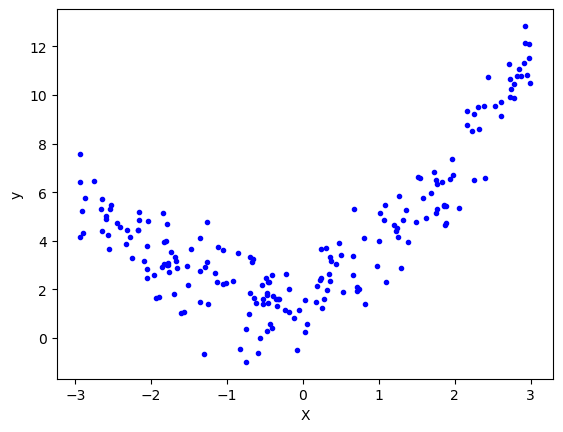

In [6]:
plt.plot(X,y,"b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
lr = LinearRegression()
lr.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [10]:
y_pred = lr.predict(X_test)
y_pred


array([[2.5351289 ],
       [6.48840621],
       [6.05863184],
       [6.13135321],
       [5.57546888],
       [4.63467902],
       [3.84856881],
       [3.29900676],
       [3.42389821],
       [6.98313766],
       [2.55048841],
       [3.00918306],
       [3.85867725],
       [2.71591244],
       [4.70886857],
       [2.64639666],
       [2.59828397],
       [5.92780677],
       [2.8491842 ],
       [3.637946  ],
       [6.34639827],
       [1.53713364],
       [4.21565807],
       [2.35138551],
       [6.92061137],
       [2.5873937 ],
       [4.18591154],
       [7.01721521],
       [2.10470593],
       [6.76445965],
       [2.16123405],
       [4.76587583],
       [3.62246457],
       [2.43418251],
       [4.96580554],
       [7.11536867],
       [3.79757591],
       [2.36872934],
       [4.07961912],
       [3.687609  ]])

In [11]:
r2_score(y_test,y_pred)

0.4478804427559504

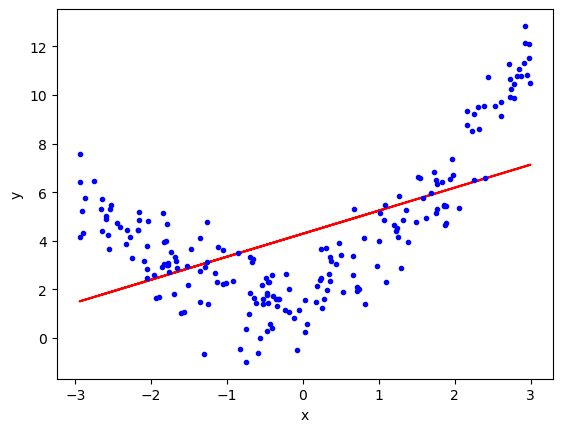

In [14]:
plt.plot(X_train,lr.predict(X_train),color = "r")
plt.plot(X,y,"b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [32]:
poly = PolynomialFeatures(degree=2) #try 5,30,50

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [33]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [34]:
y_pred = lr.predict(X_test_trans)

In [35]:
r2_score_2 = r2_score(y_test,y_pred)
r2_score_2

0.914190172849737

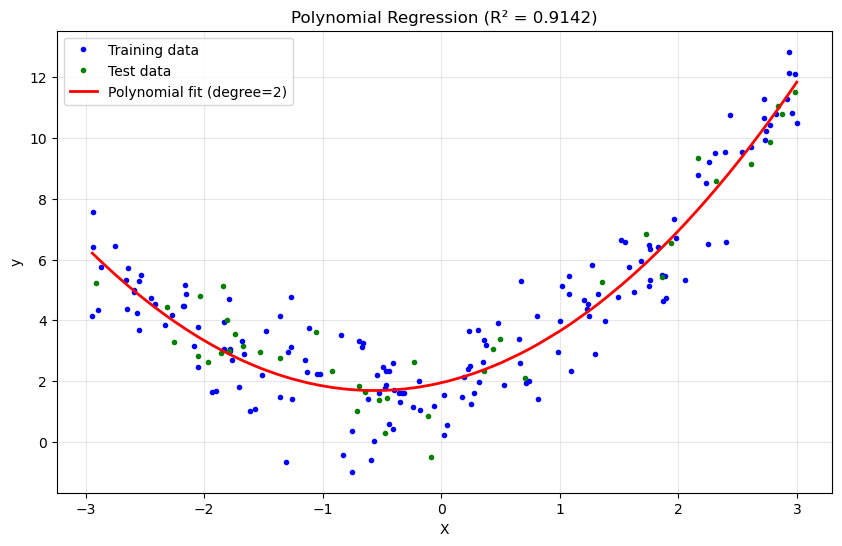

In [36]:
# Plot the polynomial regression results
plt.figure(figsize=(10, 6))

# Sort X for better line visualization
X_sorted = np.sort(X, axis=0)
y_pred_sorted = lr.predict(poly.transform(X_sorted))

# Plot training data
plt.plot(X_train, y_train, "b.", label="Training data", markersize=6)

# Plot test data
plt.plot(X_test, y_test, "g.", label="Test data", markersize=6)

# Plot polynomial regression line
plt.plot(X_sorted, y_pred_sorted, "r-", linewidth=2, label="Polynomial fit (degree=2)")

plt.xlabel("X")
plt.ylabel("y")
plt.title(f"Polynomial Regression (R² = {r2_score_2:.4f})")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()